# <center>Đồ án 3: Linear Regression</center>

# Thông tin sinh viên

- Họ và tên: Trần Trung Hiếu
- MSSV: 22127115
- Lớp: 22CLC04

# Import

In [1]:
import pandas as pd
import numpy as np
# Import thêm dữ thư viện nếu cần
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Đọc dữ liệu

In [2]:
# Đọc dữ liệu bằng pandas
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Lấy các đặc trưng X và giá trị mục tiêu y cho các tập huấn luyện (train) và kiểm tra (test)
X_train = train.iloc[:, :-1]    # Dataframe (chứa 5 đặc trưng huấn luyện)
y_train = train.iloc[:, -1]     # Series    (chứa 1 giá trị mục tiêu huấn luyện)

X_test = test.iloc[:, :-1]      # Dataframe (chứa 5 đặc trưng kiểm tra)
y_test = test.iloc[:, -1]       # Series    (chứa 1 giá trị mục tiêu kiểm tra)

# Sinh viên có thể sử dụng các khác nếu cần

# Cài đặt hàm

In [3]:
class OLSLinearRegression:
    def fit(self, X, y):
        ''' 
        This function is used to fit the model to the data. It uses the Ordinary Least Squares method to find the optimal parameters.

        Parameters
        ----------
        X : np.array
            Input data
        y : np.array
            Output data

        Returns
        -------
        self : object
            Returns the instance of the class
        
        '''

        X_pinv = np.linalg.inv(X.T @ X) @ X.T    # np.linalg.pinv(X)
        self.w = X_pinv @ y

        return self


    def get_params(self):
        ''' 
        This function is used to get the parameters of the model.

        Returns
        -------
        self.w : np.array
            Optimal parameters (column vector)
        '''

        return self.w


    def predict(self, X):
        ''' 
        This function is used to predict the output of the model.

        Parameters
        ----------
        X : np.array
            Input data

        Returns
        -------
        X @ self.w : np.array
            Predicted output
        '''

        return np.sum(self.w.ravel() * X, axis=1)


In [4]:
def mae(y, y_hat):
    ''' 
    This function is used to calculate the mean absolute error (MAE).

    Parameters
    ----------
    y : np.array
        Output data
    y_hat : np.array
        Predicted output data

    Returns
    -------
    np.mean(np.abs(y.ravel() - y_hat.ravel())) : float
        Mean absolute error
    '''

    return np.mean(np.abs(y.ravel() - y_hat.ravel()))


In [5]:
def preprocess(x):
    ''' 
    This function is used to preprocess the data. It adds a column of ones to the input data and squares the input data.

    Parameters
    ----------
    x : np.array
        Input data

    Returns
    -------
    X : np.array
        Preprocessed input data
    '''
    X = np.hstack((np.ones((x.shape[0], 1)), x))

    return X

In [6]:
def cross_validate(X, y, model, k=5):
    """
    Thực hiện k-fold cross-validation trên một mô hình đã cho và tính toán 
    Mean Absolute Error (MAE) cho mỗi lần chạy.

    Parameters:
    -----------
    X : array-like, shape (n_samples, n_features)
        Ma trận đặc trưng đầu vào.

    y : array-like, shape (n_samples,)
        Vector mục tiêu tương ứng với các mẫu trong X.

    model : estimator object
        Mô hình ước lượng (estimator) cần được huấn luyện và đánh giá.
        Mô hình này phải tuân theo giao diện chuẩn của scikit-learn (có các 
        phương thức fit và predict).

    k : int, default=5
        Số lượng folds cho k-fold cross-validation.

    Returns:
    --------
    float
        Giá trị trung bình của MAE (Mean Absolute Error) trên tất cả các folds.

    """
    kf = KFold(n_splits=k, shuffle=True, random_state=None)
    mae_scores = []
    
    for train_index, val_index in kf.split(X):
        X_cross_train, X_val = X[train_index], X[val_index]
        y_cross_train, y_val = y[train_index], y[val_index]
        X_cross_train = preprocess(X_cross_train)
        X_val = preprocess(X_val)
        model.fit(X_cross_train, y_cross_train)
        y_pred = model.predict(X_val)
        mae_score = mae(y_val, y_pred)
        mae_scores.append(mae_score)
    
    return np.mean(mae_scores)


*Chú thích: Cần có docstrings cho các hàm.*

# Yêu cầu 1: Phân tích khám phá dữ liệu (1 điểm)

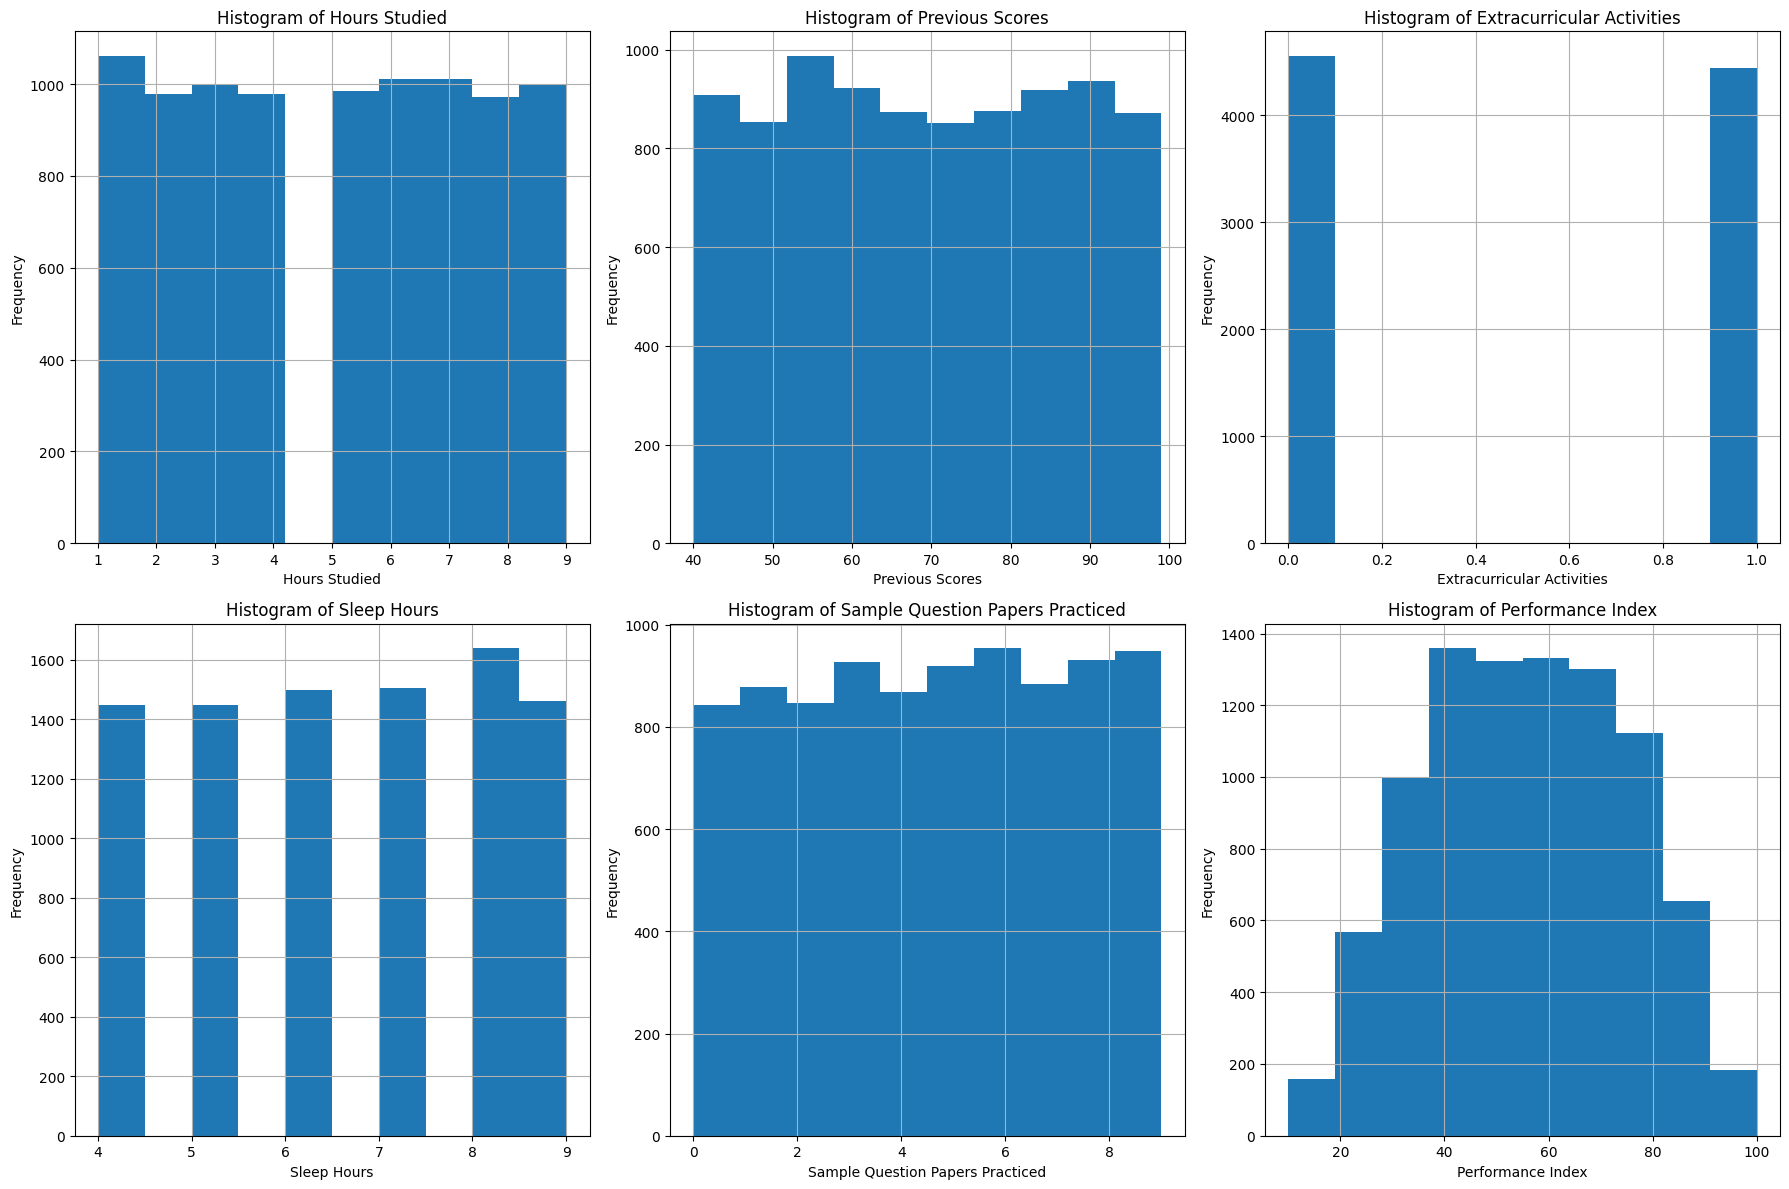

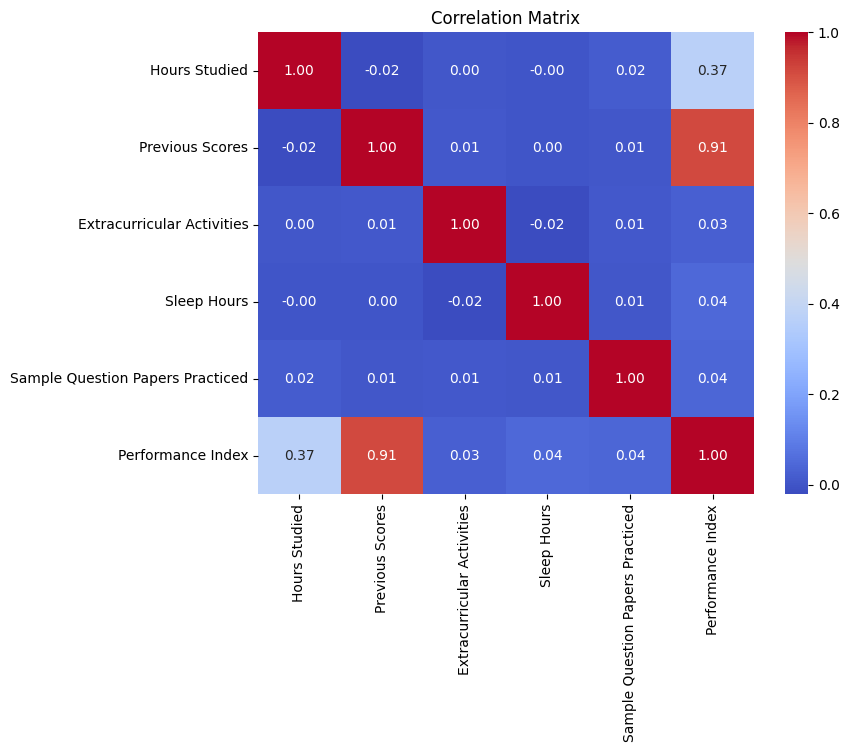

In [7]:
# Phân tích khám phá dữ liệu thông qua thống kê và các biểu đồ
# Chỉ được phân tích trên tập huấn luyện
# Loop qua từng đặc trưng để vẽ histogram với tiêu đề riêng biệt
num_columns = len(train.columns)
num_rows = (num_columns + 2) // 3  # Số hàng = số đặc trưng / 3 (mỗi hàng 3 cột)

# Tạo lưới các subplot
fig, axes = plt.subplots(num_rows, 3, figsize=(18, 6 * num_rows))
axes = axes.flatten()  # Chuyển lưới thành 1D array để dễ dàng loop qua

# Loop qua từng đặc trưng để vẽ histogram
for i, column in enumerate(train.columns):
    train[column].hist(bins=10, ax=axes[i])
    axes[i].set_title(f'Histogram of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

# Ẩn các subplot thừa
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Vẽ heatmap cho ma trận tương quan
plt.figure(figsize=(8, 6))
corr_matrix = train.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()



Text(0, 0.5, 'Performance Index')

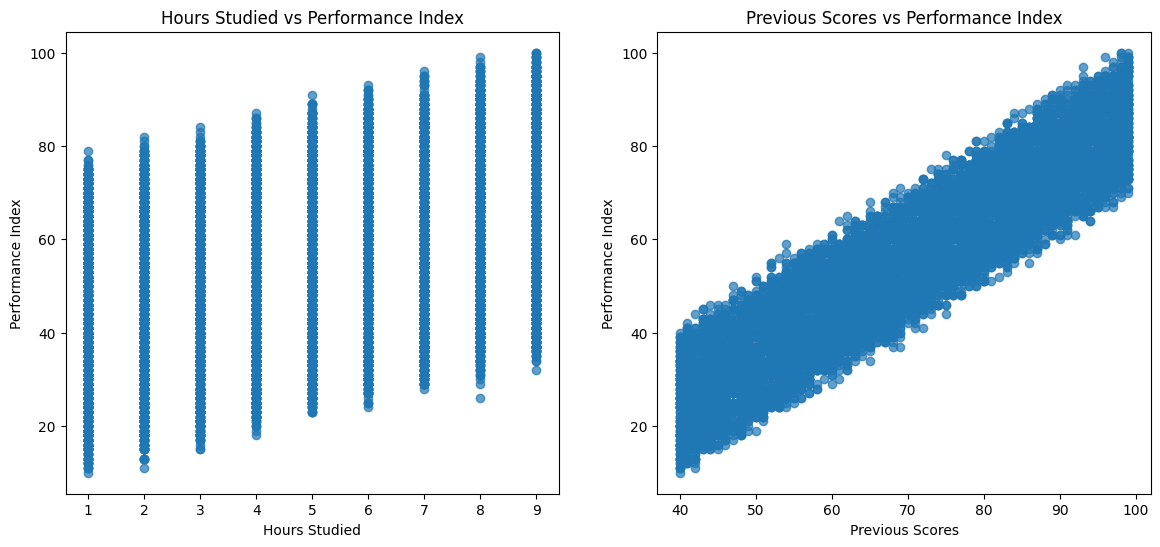

In [8]:
plt.figure(figsize=(14, 6))

# Scatter plot for Hours Studied vs Performance Index
plt.subplot(1, 2, 1)
plt.scatter(train['Hours Studied'], train['Performance Index'], alpha=0.7)
plt.title('Hours Studied vs Performance Index')
plt.xlabel('Hours Studied')
plt.ylabel('Performance Index')

# Scatter plot for Previous Scores vs Performance Index
plt.subplot(1, 2, 2)
plt.scatter(train['Previous Scores'], train['Performance Index'], alpha=0.7)
plt.title('Previous Scores vs Performance Index')
plt.xlabel('Previous Scores')
plt.ylabel('Performance Index')

# Yêu cầu 2a: Xây dựng mô hình sử dụng toàn bộ 5 đặc trưng đề bài cung cấp (2 điểm) 

In [9]:
# Phần code cho yêu cầu 2a
# Huấn luyện mô hình
model = OLSLinearRegression()
X_train_1=preprocess(X_train)
model.fit(X_train_1, y_train)
params = model.get_params()
params_rounded = np.round(params, 3)
print("Hệ số hồi quy (w):", params_rounded)

Hệ số hồi quy (w): [-33.969   2.852   1.018   0.604   0.474   0.192]


$$ \text{Student Performance} = -33,969 + 2,852 * Hours Studied + 1,018 * Previous Scores + 0,604 * Extracurricular Activities + 0,474 * Sleep Hours + 0,192 * Sample Question Papers Practiced $$

In [10]:
# Gọi hàm MAE (tự cài đặt hoặc từ thư viện) trên tập kiểm tra
X_test_1=preprocess(X_test)
y_pred1 = model.predict(X_test_1)
error = mae(y_test, y_pred1)
print("Mean Absolute Error (MAE) trên tập kiểm tra:", error)

Mean Absolute Error (MAE) trên tập kiểm tra: 1.5956486884762893


# Yêu cầu 2b: Xây dựng mô hình sử dụng duy nhất 1 đặc trưng, tìm mô hình cho kết quả tốt nhất (2 điểm)

Lưu ý: Khi sử dụng cross-validation, sinh viên cần xáo trộn dữ liệu 1 lần duy nhất và thực hiện trên toàn bộ đặc trưng

In [11]:
# Phần code cho yêu cầu 2b
# Danh sách các đặc trưng
features = ['Hours Studied', 'Previous Scores', 'Extracurricular Activities', 'Sleep Hours', 'Sample Question Papers Practiced']
mae_results = []

# Vòng lặp qua từng đặc trưng để tính MAE
for feature in features:
    X_single = X_train[[feature]].values
    model = OLSLinearRegression()
    mae_result = cross_validate(X_single, y_train, model)
    mae_results.append(mae_result)

# Tạo DataFrame từ kết quả
df_results = pd.DataFrame({
    'STT': range(1, len(features) + 1),
    'Mô hình với 1 đặc trưng': features,
    'MAE': mae_results
})

# Tìm ra đặc trưng tốt nhất (trong 5 đặc trưng)
min_mae_index = df_results['MAE'].idxmin()  # Lấy chỉ số của hàng có MAE nhỏ nhất
best_feature = df_results.loc[min_mae_index, 'Mô hình với 1 đặc trưng']  # Lấy tên đặc trưng tương ứng

# In ra đặc trưng tốt nhất và giá trị MAE tương ứng
print(f"Đặc trưng tốt nhất là: {best_feature} với MAE là: {df_results.loc[min_mae_index, 'MAE']}")

# In ra các kết quả cross-validation như yêu cầu
df_results


Đặc trưng tốt nhất là: Previous Scores với MAE là: 6.620154694254505


,STT,Mô hình với 1 đặc trưng,MAE
0,1,Hours Studied,15.450279
1,2,Previous Scores,6.620155
2,3,Extracurricular Activities,16.193951
3,4,Sleep Hours,16.187967
4,5,Sample Question Papers Practiced,16.188896


In [12]:
# Huấn luyện lại mô hình best_feature_model với đặc trưng tốt nhất trên toàn bộ tập huấn luyện
X_train_best = X_train[['Previous Scores']].values
X_train_processed = preprocess(X_train_best)
best_feature_model = OLSLinearRegression()
best_feature_model.fit(X_train_processed, y_train)
best_feature_params = best_feature_model.get_params()
params_rounded = np.round(best_feature_params, 3)
print("Hệ số hồi quy (w):", params_rounded)

Hệ số hồi quy (w): [-14.989   1.011]


In [13]:
# Gọi hàm MAE (tự cài đặt hoặc từ thư viện) trên tập kiểm tra với mô hình best_feature_model
X_test_best= X_test[[best_feature]].values
X_test_processed = preprocess(X_test_best)
y_pred_best = best_feature_model.predict(X_test_processed)

# Tính toán MAE bằng hàm tự cài đặt
mae_custom = mae(y_test, y_pred_best)
print("MAE trên tập kiểm tra:", mae_custom)

MAE trên tập kiểm tra: 6.5442772934525015


Công thức hồi quy (dựa trên mô hình đặc trưng tốt nhất), phần trọng số làm tròn đến 3 chữ số thập phân, ví dụ 0.012345 $\to$ 0.012

$$\text{Student Performance} =  -14.989 + 1.011 * Previous Scores$$

# Yêu cầu 2c: Sinh viên tự xây dựng/thiết kế mô hình, tìm mô hình cho kết quả tốt nhất (2 điểm)

## Xây dựng/Thiết kế mô hình

In [14]:
# Trình bày toàn bộ code liên quan đến việc thiết kế mô hình
# Chuẩn bị dữ liệu cho mô hình đầu tiên
X_train_transformed = X_train.copy()
features = ['Hours Studied', 'Previous Scores']
X1 = X_train_transformed[features].values

# Chuẩn bị dữ liệu cho mô hình thứ hai
X_train_transformed = X_train.copy()
features = ['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced']
X2 = X_train_transformed[features].values

# Chuẩn bị dữ liệu cho mô hình thứ ba
features = ['Hours Studied', 'Previous Scores', 'Extracurricular Activities', 'Sleep Hours', 'Sample Question Papers Practiced']
X_train_transformed = X_train.copy()

# Bình phương từng feature
X_train_transformed['Extracurricular Activities'] = X_train_transformed['Extracurricular Activities'] ** 2
X_train_transformed['Sleep Hours'] = X_train_transformed['Sleep Hours'] ** 2
X_train_transformed['Sample Question Papers Practiced'] = X_train_transformed['Sample Question Papers Practiced'] ** 2


# Chọn lại các feature sau khi đã bình phương
X3 = X_train_transformed[features].values
scaler = StandardScaler()
X3 = scaler.fit_transform(X3)

## Tìm mô hình cho kết quả tốt nhất

Lưu ý: Khi sử dụng cross-validation, sinh viên cần xáo trộn dữ liệu 1 lần duy nhất và thực hiện trên toàn bộ $m$ mô hình mà sinh viên thiết kế

In [15]:
# Phần code cho yêu cầu 2c
# Mô hình đầu tiên: Huấn luyện với ['Hours Studied', 'Previous Scores']
model1 = OLSLinearRegression()
mae_model1 = cross_validate(X1, y_train, model1)

# Mô hình thứ hai:
model2 = OLSLinearRegression()
mae_model2 = cross_validate(X2, y_train, model2)

# Mô hình thứ ba:
model3 = OLSLinearRegression()
mae_model3 = cross_validate(X3, y_train, model3)

# Tìm ra mô hình tốt nhất (trong m mô hình mà sinh viên tự thiết kế)
best_model_index = np.argmin([mae_model1, mae_model2, mae_model3])
models = [model1, model2, model3]
my_best_model = models[best_model_index]
print(my_best_model.get_params())
# In ra các kết quả cross-validation như yêu cầu
models = {
    'STT': ['1', '2', '3'],
    'Mô hình': [
        "Sử dụng 2 đặc trưng ('Hours Studied', 'Previous Scores')", 
        "Sử dụng 4 đặc trưng ('Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced')", 
        "Bình phương 3 đặc trưng ('Extracurricular Activities', 'Sleep Hours', 'Sample Question Papers Practiced')"
    ],
    'MAE': [mae_model1, mae_model2, mae_model3]
}
pd.set_option('display.max_colwidth', None)


# Create DataFrame
df = pd.DataFrame(models)

# Display the DataFrame
df

[55.14188315  7.39845186 17.6814751   0.3162078   0.7953232   0.52797029]


,STT,Mô hình,MAE
0,1,"Sử dụng 2 đặc trưng ('Hours Studied', 'Previous Scores')",1.816827
1,2,"Sử dụng 4 đặc trưng ('Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced')",1.641255
2,3,"Bình phương 3 đặc trưng ('Extracurricular Activities', 'Sleep Hours', 'Sample Question Papers Practiced')",1.626460


In [16]:
# Huấn luyện lại mô hình my_best_model trên toàn bộ tập huấn luyện
X_train_processed = preprocess(X3)
best_model = OLSLinearRegression()
best_model.fit(X_train_processed, y_train)
best_feature_params = best_model.get_params()
params_rounded = np.round(best_feature_params, 3)
print("Hệ số hồi quy (w):", params_rounded)

Hệ số hồi quy (w): [55.136  7.403 17.68   0.304  0.801  0.53 ]


In [17]:
# Gọi hàm MAE (tự cài đặt hoặc từ thư viện) trên tập kiểm tra với mô hình my_best_model
X_test_transformed = X_test.copy()

# Apply the same feature transformations as in training
X_test_transformed['Extracurricular Activities'] = X_test_transformed['Extracurricular Activities'] ** 2
X_test_transformed['Sleep Hours'] = X_test_transformed['Sleep Hours'] ** 2
X_test_transformed['Sample Question Papers Practiced'] = X_test_transformed['Sample Question Papers Practiced'] ** 2

# Ensure the transformed data is used correctly
X_test_transformed = X_test_transformed.values  # This line is fine now

# Apply the scaler trained on X_train to X_test
X_test_transformed = scaler.transform(X_test_transformed)  # Only transform, don't fit again

# Process the transformed test set
X_test_processed = preprocess(X_test_transformed)

# Make predictions
y_pred = my_best_model.predict(X_test_processed)

# Calculate the MAE using the custom function
best_mae = mae(y_test, y_pred)
print("MAE trên tập kiểm tra:", best_mae)


MAE trên tập kiểm tra: 1.6003342383847863


Công thức hồi quy (dựa trên mô hình tốt nhất mà sinh viên tự xây dựng/thiết kế), phần trọng số làm tròn đến 3 chữ số thập phân, ví dụ 0.012345 $\to$ 0.012

$$
\text{Student Performance} = 55.136 + 7.403 \times \text{Hours Studied} + 17.68 \times \text{Previous Scores} + 0.304 \times (\text{Extracurricular Activities})^2 + 0.801 \times (\text{Sleep Hours})^2 + 0.53 \times (\text{Sample Question Papers Practiced})^2
$$
